In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.fftpack import fft,ifft
from schrodinger import Schrodinger
import matplotlib.pyplot as plt
import scipy
import sympy as sp

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns
hbar = 1.0

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.7,  rc={"lines.linewidth": 5})
sns.set_palette(sns.color_palette("deep"))

### Continuous potential

In [3]:
@np.vectorize
def V(x,coeffs=[0.3,-0.1,0.7,3.4]):
    pot = 0.
    for n,c in enumerate(coeffs):
        pot += c*x**n
    
    return pot

In [4]:
E = 0.1
m = 1.0
hb = 1.0
xpts = np.linspace(-3,3,100)
phippF = lambda x: (2*m/hb**2)*(V(x)-E)
phipF = lambda x: scipy.integrate.quad(phippF,min(xpts),x)[0]
phiF = lambda x: scipy.integrate.quad(phipF,min(xpts),x)[0]

In [5]:
Vpts = V(xpts)
phipp = [phippF(x) for x in xpts]
phip = [phipF(x) for x in xpts]
phi = [phiF(x) for x in xpts]

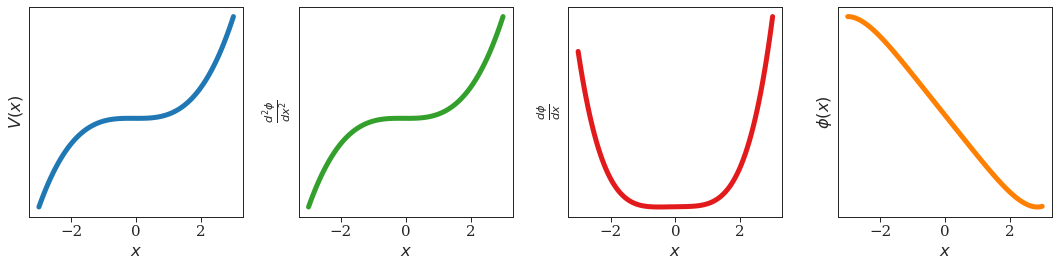

In [6]:
fig,axes = plt.subplots(ncols=4,nrows=1,figsize=(15,4))

colors = sns.color_palette("Paired",2*len(axes))[1::2]
xlabels = [r'$x$']*len(axes)
ylabels = [r'$V(x)$',r'$\frac{d^2\phi}{dx^2}$',r'$\frac{d\phi}{dx}$',r'$\phi(x)$']
ydata = [Vpts,phipp,phip,phi]
xdata = [xpts]*len(axes)
for i,ax in enumerate(axes):
    ax.plot(xdata[i],ydata[i],c=colors[i])
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel(ylabels[i])
    ax.set_yticks([])


plt.tight_layout()
plt.savefig('contPot.png')
plt.show()

In [7]:
ax.set_ylim(-250,20)

(-250.0, 20.0)

### Discontinuous (finite) potential

In [8]:
@np.vectorize
def V(x,coeffs=[0.3,-0.1,0.7,3.4],x0=1,dV=30):
    pot = 0.
    for n,c in enumerate(coeffs):
        pot += c*x**n
    
    if x > x0:
        pot += dV
    return pot

In [9]:
E = 0.1
m = 1.0
hb = 1.0
xpts = np.linspace(-3,3,100)
phippF = lambda x: (2*m/hb**2)*(V(x)-E)
phipF = lambda x: scipy.integrate.quad(phippF,min(xpts),x,points=[1.0])[0]
phiF = lambda x: scipy.integrate.quad(phipF,min(xpts),x,points=[1.0])[0]

In [10]:
Vpts = V(xpts)
phipp = [phippF(x) for x in xpts]
phip = [phipF(x) for x in xpts]
phi = [phiF(x) for x in xpts]

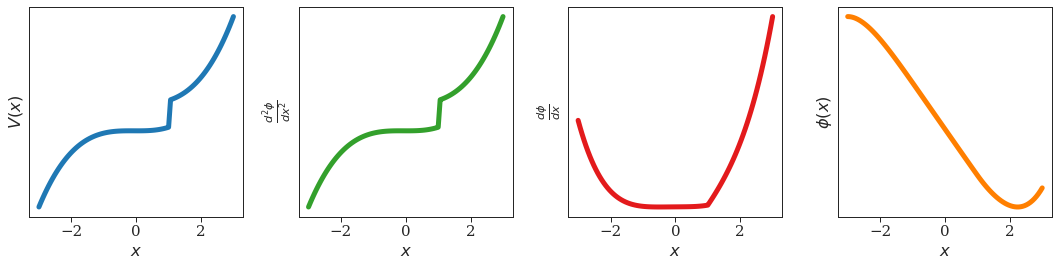

In [11]:
fig,axes = plt.subplots(ncols=4,nrows=1,figsize=(15,4))

colors = sns.color_palette("Paired",2*len(axes))[1::2]
xlabels = [r'$x$']*len(axes)
ylabels = [r'$V(x)$',r'$\frac{d^2\phi}{dx^2}$',r'$\frac{d\phi}{dx}$',r'$\phi(x)$']
ydata = [Vpts,phipp,phip,phi]
xdata = [xpts]*len(axes)
for i,ax in enumerate(axes):
    ax.plot(xdata[i],ydata[i],c=colors[i])
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel(ylabels[i])
    ax.set_yticks([])


plt.tight_layout()
plt.savefig('discontPot.png')
plt.show()

### Discontinuous (infinite) potential

In [12]:
@np.vectorize
def V(x,coeffs=[0.3,-0.1,0.7,3.4],x0=1,dV=30):
    pot = 0.
    for n,c in enumerate(coeffs):
        pot += c*x**n
    
#     if x > x0:
    pot += abs(np.tan(x))
    return pot

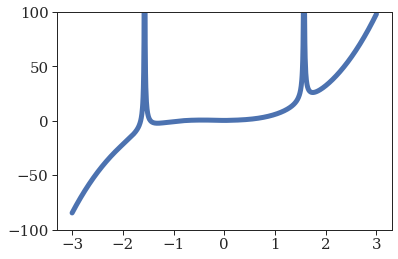

In [13]:
xpts = np.linspace(-3,3,1000)
plt.plot(xpts,V(xpts))
plt.ylim(-100,100)
plt.show()

In [16]:
E = 0.1
m = 1.0
hb = 1.0
xpts = np.linspace(-2,-1,200)
phippF = lambda x: (2*m/hb**2)*(V(x)-E)
def phipF(x):
    ep = 0.1
    xsing = np.pi/2
    if x < -xsing:
        res = scipy.integrate.quad(phippF,min(xpts),x,points=[-xsing,xsing])[0]
    else:
        res = scipy.integrate.quad(phippF,min(xpts),-xsing-ep,points=[-xsing,xsing])[0]
        if  x < xsing:
            res += scipy.integrate.quad(phippF,-xsing+ep,x,points=[-xsing,xsing])[0]
        else:
            res += scipy.integrate.quad(phippF,-xsing+ep,xsing-ep,points=[-xsing,xsing])[0]
            res += scipy.integrate.quad(phippF,xsing+ep,x,points=[-xsing,xsing])[0]
    return res

phiF = lambda x: scipy.integrate.quad(phipF,min(xpts),x,points=[-3*np.pi/2,-np.pi/2,np.pi/2,3*np.pi/2.])[0]

In [17]:
Vpts = V(xpts)
phipp = [phippF(x) for x in xpts]
phip = [phipF(x) for x in xpts]
phi = [phiF(x) for x in xpts]

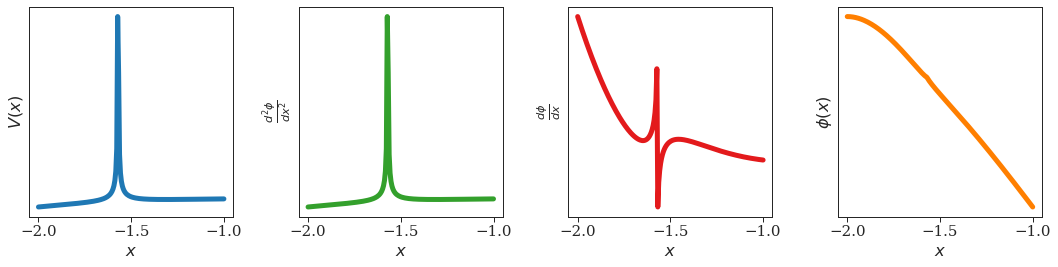

In [18]:
fig,axes = plt.subplots(ncols=4,nrows=1,figsize=(15,4))

colors = sns.color_palette("Paired",2*len(axes))[1::2]
xlabels = [r'$x$']*len(axes)
ylabels = [r'$V(x)$',r'$\frac{d^2\phi}{dx^2}$',r'$\frac{d\phi}{dx}$',r'$\phi(x)$']
ydata = [Vpts,phipp,phip,phi]
xdata = [xpts]*len(axes)
for i,ax in enumerate(axes):
    ax.plot(xdata[i],ydata[i],c=colors[i])
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel(ylabels[i])
    ax.set_yticks([])
#     ax.set_ylim(-150,-100)
#     ax.set_xlim(-2,-1)


plt.tight_layout()
plt.savefig('infPot.png')
plt.show()